In [21]:
# load final.csv to df

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('final.csv')

print(data.head())
print(data.info())



   Country Name  Diabetes Rate  Inactivity Rate  che_gdp  \
0       Algeria      20.333602        29.036757      5.5   
1        Angola      50.005628        17.329948      3.0   
2         Benin      48.271830        18.024012      2.6   
3      Botswana     111.848291        22.275454      6.3   
4  Burkina Faso      47.812368        16.943354      6.4   

   Diabetes Mortality Rate  
0                20.333602  
1                50.005628  
2                48.271830  
3               111.848291  
4                47.812368  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country Name             192 non-null    object 
 1   Diabetes Rate            181 non-null    float64
 2   Inactivity Rate          191 non-null    float64
 3   che_gdp                  189 non-null    float64
 4   Diabetes Mortality Rate  181 non

<AxesSubplot:>

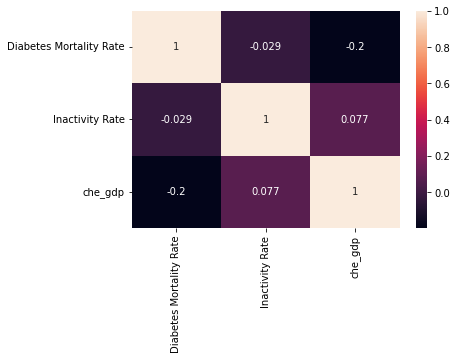

In [22]:
# plot a correlation matrix between death of diabetes, physical inactivity and che_gdp

sns.heatmap(data[['Diabetes Mortality Rate', 'Inactivity Rate', 'che_gdp']].corr(), annot=True)

[[0.56682929 0.80944261 0.15332065]
 [0.94335299 0.32692837 0.05659481]
 [0.93563508 0.34935277 0.05039484]
 [0.9792462  0.19502447 0.05515731]
 [0.93515262 0.3313917  0.12517633]]
For k=2, Davies-Bouldin score is 0.5465422471024206
For k=3, Davies-Bouldin score is 0.6032241533585391
For k=4, Davies-Bouldin score is 0.837705214950629
For k=5, Davies-Bouldin score is 0.7408669769667814
For k=6, Davies-Bouldin score is 0.7290191897454968
For k=7, Davies-Bouldin score is 0.7684525008994594
For k=8, Davies-Bouldin score is 0.838738038876487
For k=9, Davies-Bouldin score is 0.8086202100553147
For k=10, Davies-Bouldin score is 0.7173018495816574


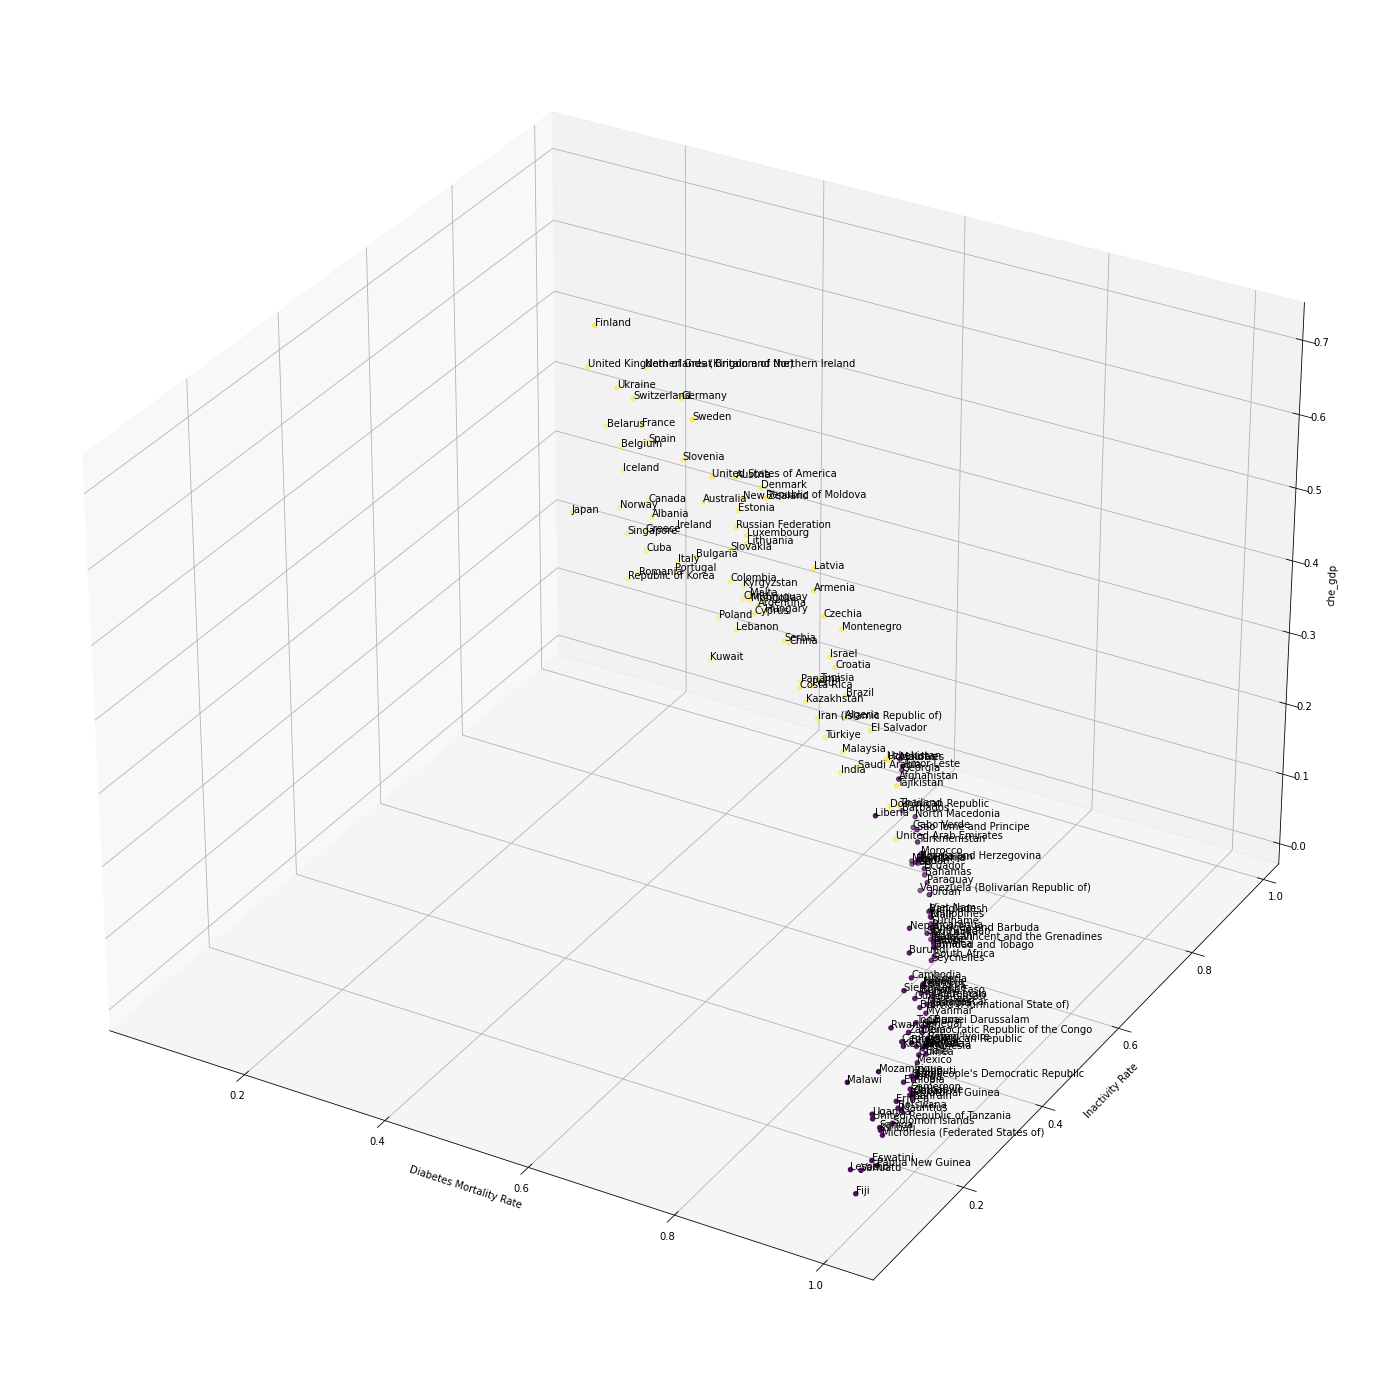

In [23]:
# Remove NaN values from che_gdp and Diabetes Mortality Rate and Inactivity Rate

data = data.dropna(subset=['che_gdp', 'Diabetes Mortality Rate', 'Inactivity Rate'])

# Normalize Inactivity Rate and che_gdp and Diabetes Mortality Rate using Normalize from sklearn

from sklearn.preprocessing import normalize

data_normalized = normalize(data[['Diabetes Mortality Rate', 'Inactivity Rate', 'che_gdp']])

#plot 5 first rows of data_normalized

print(data_normalized[:5])

# Save the normalized data to a new csv containing which country

# Perform KMeans clustering on the normalized data

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(data_normalized)

# Plot 3D scatter plot of the data with the points colored according to the cluster they belong to

fig = plt.figure(figsize=(25, 25))

ax = fig.add_subplot(111, projection='3d')
#plot the clusters for the normalized data
# and print all countries and which cluster they belong to (purple or yellow)

ax.scatter(data_normalized[:,0], data_normalized[:,1], data_normalized[:,2], c=kmeans.labels_, cmap='viridis')

for i, txt in enumerate(data['Country Name']):
    ax.text(data_normalized[i,0], data_normalized[i,1], data_normalized[i,2], txt)



ax.set_xlabel('Diabetes Mortality Rate')
ax.set_ylabel('Inactivity Rate')
ax.set_zlabel('che_gdp')

# Loop over different values of k and compute the KMeans clustering and Davies-Bouldin score

from sklearn.metrics import davies_bouldin_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data_normalized)
    score = davies_bouldin_score(data_normalized, kmeans.labels_)
    print(f'For k={k}, Davies-Bouldin score is {score}')



In [24]:
# Perform KMeans clustering with k=10 on the normalized data
kmeans_10 = KMeans(n_clusters=4, random_state=0).fit(data_normalized)

# make data normalized into a csv


# Create a DataFrame to show which countries belong to which cluster
clusters_df = pd.DataFrame({'Country Name': data['Country Name'], 'Cluster': kmeans_10.labels_})

# Display the DataFrame
print(clusters_df)

# Optionally, save the DataFrame to a CSV file
clusters_df.to_csv('country_clusters_k4.csv', index=False)

# add cluster column to data

data['Cluster'] = kmeans_10.labels_

data.to_csv('final_with_clusters.csv', index=False)

        Country Name  Cluster
0            Algeria        3
1             Angola        1
2              Benin        1
3           Botswana        1
4       Burkina Faso        1
..               ...      ...
186        Singapore        3
187  Solomon Islands        1
188            Tonga        1
190          Vanuatu        1
191         Viet Nam        2

[178 rows x 2 columns]


In [25]:
import pandas as pd

# Load the original data
df = pd.read_csv('final.csv')

# Identify numeric columns for normalization
numeric_columns = ['Diabetes Mortality Rate', 'Inactivity Rate', 'che_gdp']

# Apply Min-Max normalization for each numeric column
df[numeric_columns] = (df[numeric_columns] - df[numeric_columns].min()) / (df[numeric_columns].max() - df[numeric_columns].min())

# Now df should have normalized values for each numeric column

# Save the normalized data to a new csv containing which country

df.to_csv('normalized_final.csv', index=False)




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


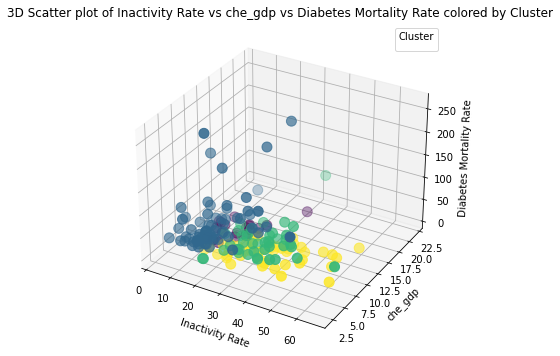

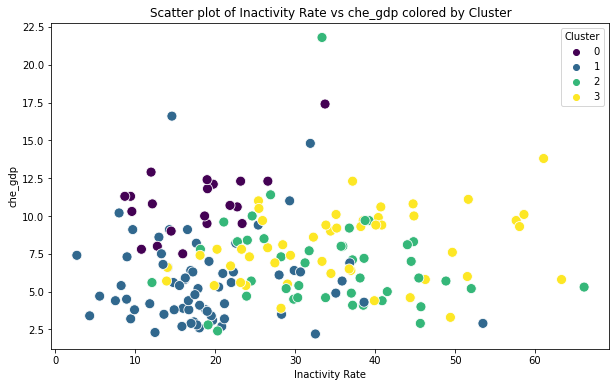

In [26]:
# Plot the data in a scatterplot where each cluster has its own color

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Inactivity Rate'], data['che_gdp'], data['Diabetes Mortality Rate'], c=data['Cluster'], cmap='viridis', s=100)
ax.set_title('3D Scatter plot of Inactivity Rate vs che_gdp vs Diabetes Mortality Rate colored by Cluster')
ax.set_xlabel('Inactivity Rate')
ax.set_ylabel('che_gdp')
ax.set_zlabel('Diabetes Mortality Rate')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Inactivity Rate', y='che_gdp', hue='Cluster', palette='viridis', s=100)
plt.title('Scatter plot of Inactivity Rate vs che_gdp colored by Cluster')
plt.xlabel('Inactivity Rate')
plt.ylabel('che_gdp')
plt.legend(title='Cluster')
plt.show()

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

data_clean = data[['Diabetes Mortality Rate', 'Inactivity Rate', 'che_gdp']].dropna()

# Step 2: Define dependent and independent variables
X = data_clean[['Inactivity Rate', 'che_gdp']]  # Independent variables
y = data_clean['Diabetes Mortality Rate']        # Dependent variable

# Step 3: Train-test split (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Fit the regression model using sklearn
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Step 5: Make predictions on test set
y_pred = regressor.predict(X_test)

# Step 6: Evaluate the model
print('Intercept:', regressor.intercept_)
print('Coefficients:', regressor.coef_)

# Metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared score:', regressor.score(X_test, y_test))

# Step 7: Use statsmodels for a detailed summary
X_sm = sm.add_constant(X_train)  # Adding constant for intercept
model = sm.OLS(y_train, X_sm).fit()
print(model.summary())


Intercept: 51.7970022356603
Coefficients: [ 0.18550729 -1.97354498]
Mean Absolute Error (MAE): 28.173293134564858
Mean Squared Error (MSE): 1849.21537362005
Root Mean Squared Error (RMSE): 43.002504271496214
R-squared score: 0.013172429918636763
                               OLS Regression Results                              
Dep. Variable:     Diabetes Mortality Rate   R-squared:                       0.026
Model:                                 OLS   Adj. R-squared:                  0.012
Method:                      Least Squares   F-statistic:                     1.871
Date:                     Mon, 14 Oct 2024   Prob (F-statistic):              0.158
Time:                             11:02:36   Log-Likelihood:                -723.22
No. Observations:                      142   AIC:                             1452.
Df Residuals:                          139   BIC:                             1461.
Df Model:                                2                                        

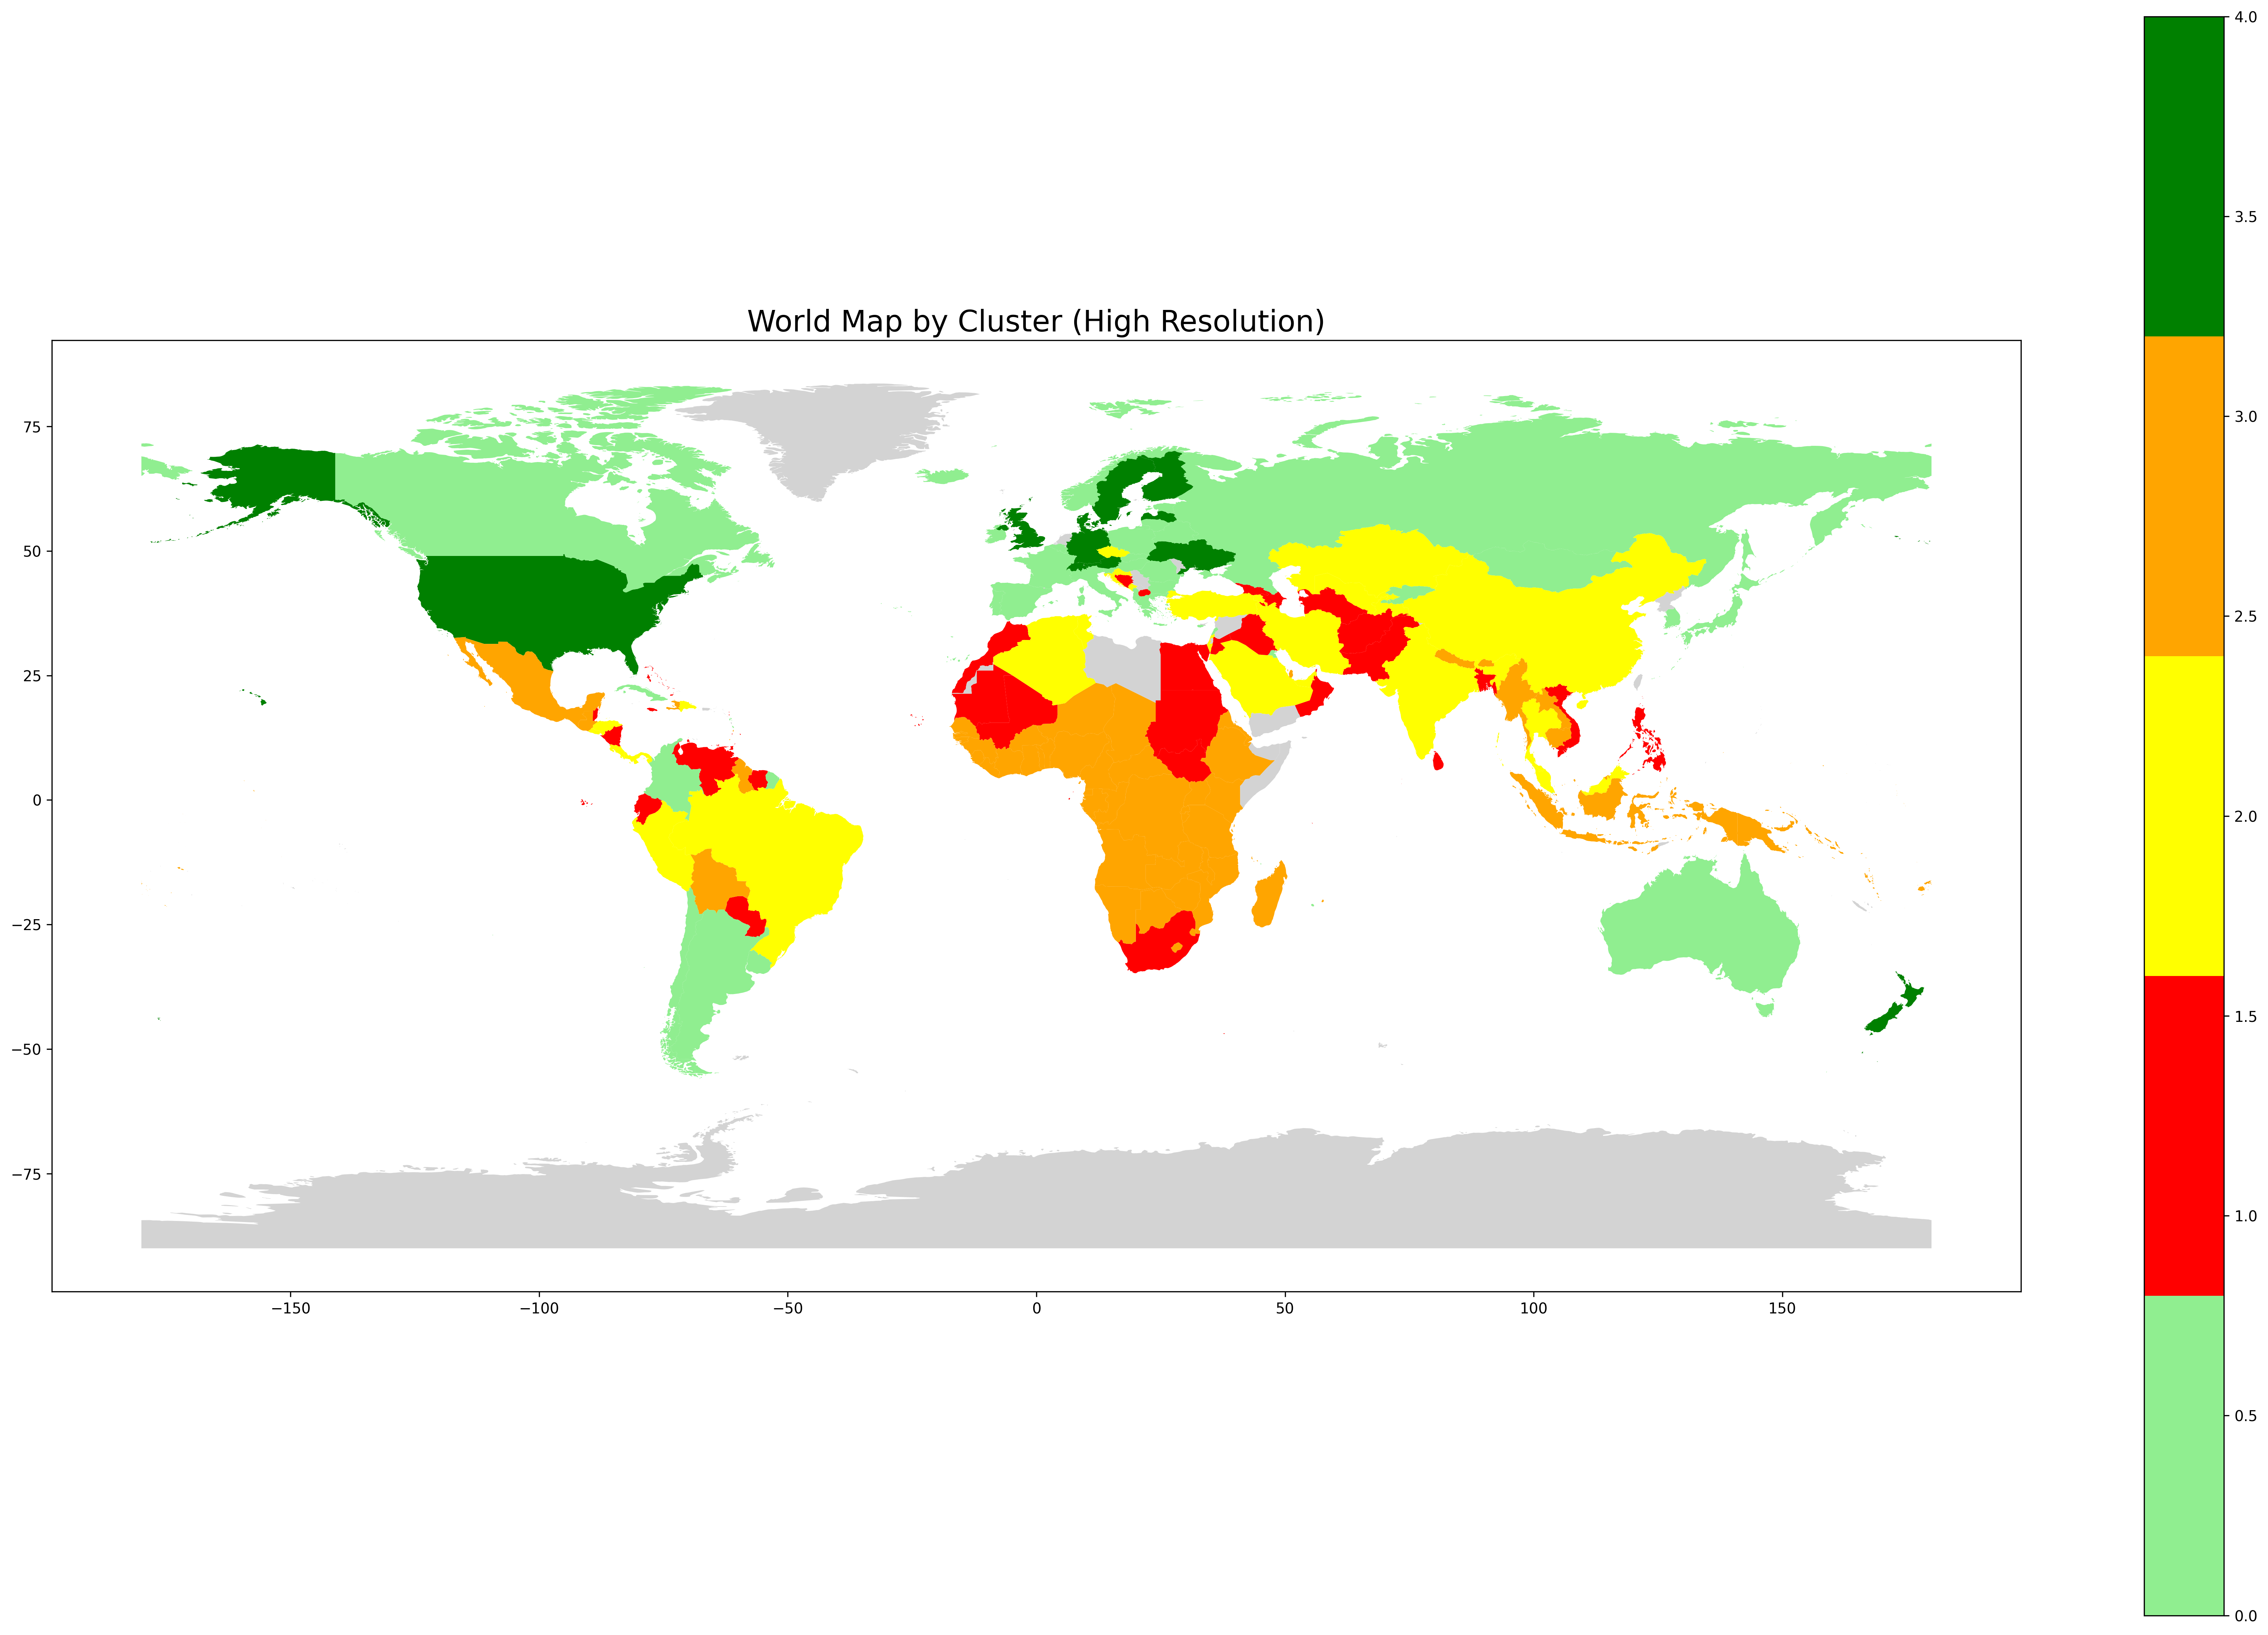

In [36]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Try explicitly using the pyogrio engine for reading from URL
url = "https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_countries.zip"
world = gpd.read_file(url, engine="pyogrio")  # Try with 'pyogrio'

# Load your CSV file (Make sure the path is correct)
df = pd.read_csv('country_clusters_k5_new.csv')

# Merge the datasets based on the country name
merged = world.merge(df, how='left', left_on='ADMIN', right_on='Country Name')

# Define the color map for clusters
color_map = {
    0: 'lightgreen',
    1: 'red',
    2: 'yellow',
    3: 'orange',
    4: 'green'
}

cmap = ListedColormap([color_map[i] for i in sorted(color_map.keys())])

# Plot the world map with the colored clusters
fig, ax = plt.subplots(1, 1, figsize=(30, 20), dpi=300)
merged.plot(column='Cluster', cmap=cmap, ax=ax, legend=True, 
            missing_kwds={"color": "lightgrey"})

# Add a title and show the plot
plt.title('World Map by Cluster (High Resolution)', fontsize=20)
plt.savefig('world_map_by_cluster_high_res.png', dpi=300, bbox_inches='tight')  # Save as a high-res image
plt.show()

In [37]:
import geopandas as gpd
import pandas as pd

# Load the shapefile from the Natural Earth data
url = "https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_countries.zip"
world = gpd.read_file(url, engine='pyogrio')

# Load your CSV file
df = pd.read_csv('country_clusters_k5_new.csv')

# Merge the datasets based on the country name
merged = world.merge(df, how='left', left_on='ADMIN', right_on='Country Name')

# Find rows where 'Cluster' is missing (NaN)
missing_data_countries = merged[merged['Cluster'].isna()]['ADMIN']

# Output the countries with missing data
print("Countries with missing data:")
print(missing_data_countries.to_list())


Countries with missing data:
['Yemen', 'Vatican', 'Marshall Islands', 'Northern Mariana Islands', 'United States Virgin Islands', 'Guam', 'American Samoa', 'Puerto Rico', 'South Georgia and the Islands', 'British Indian Ocean Territory', 'Saint Helena', 'Pitcairn Islands', 'Anguilla', 'Falkland Islands', 'Cayman Islands', 'Bermuda', 'British Virgin Islands', 'Turks and Caicos Islands', 'Montserrat', 'Jersey', 'Guernsey', 'Isle of Man', 'East Timor', 'Taiwan', 'Syria', 'Somalia', 'Somaliland', 'Republic of Serbia', 'San Marino', 'Saint Kitts and Nevis', 'Palau', 'North Korea', 'Niue', 'Cook Islands', 'Netherlands', 'Aruba', 'Curaçao', 'Nauru', 'Western Sahara', 'Moldova', 'Monaco', 'Liechtenstein', 'Libya', 'Kosovo', 'Palestine', 'Saint Pierre and Miquelon', 'Wallis and Futuna', 'Saint Martin', 'Saint Barthelemy', 'French Polynesia', 'New Caledonia', 'French Southern and Antarctic Lands', 'Aland', 'Dominica', 'Greenland', 'Faroe Islands', 'Northern Cyprus', 'Macao S.A.R', 'Hong Kong S.A

In [40]:
#get all countries from the GHED_data.csv column

ghed_data = pd.read_csv('GHED_data.csv')

#print all countries from the GHED_data.csv column (no duplicates)

print(ghed_data['country'].unique())

<ipython-input-40-f238ca0dbd1e>:3: DtypeWarning: Columns (6,22,23,24,36,38,102,103,104,105,109,110,111,117,119,125,126,127,128,132,133,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,240,241,242,243,244,245,247,248,249,250,251,253,254,255,256,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,3

['Algeria' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cabo Verde' 'Cameroon' 'Central African Republic' 'Chad' 'Comoros'
 'Congo' "Côte d'Ivoire" 'Democratic Republic of the Congo'
 'Equatorial Guinea' 'Eritrea' 'Eswatini' 'Ethiopia' 'Gabon' 'Gambia'
 'Ghana' 'Guinea' 'Guinea-Bissau' 'Kenya' 'Lesotho' 'Liberia' 'Madagascar'
 'Malawi' 'Mali' 'Mauritania' 'Mauritius' 'Mozambique' 'Namibia' 'Niger'
 'Nigeria' 'Rwanda' 'Sao Tome and Principe' 'Senegal' 'Seychelles'
 'Sierra Leone' 'South Africa' 'South Sudan' 'Togo' 'Uganda'
 'United Republic of Tanzania' 'Zambia' 'Zimbabwe' 'Antigua and Barbuda'
 'Argentina' 'Bahamas' 'Barbados' 'Belize'
 'Bolivia (Plurinational State of)' 'Brazil' 'Canada' 'Chile' 'Colombia'
 'Costa Rica' 'Cuba' 'Dominica' 'Dominican Republic' 'Ecuador'
 'El Salvador' 'Grenada' 'Guatemala' 'Guyana' 'Haiti' 'Honduras' 'Jamaica'
 'Mexico' 'Nicaragua' 'Panama' 'Paraguay' 'Peru' 'Saint Kitts and Nevis'
 'Saint Lucia' 'Saint Vincent and the Grenadines' 'Suriname'
